In [4]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import warnings
warnings.filterwarnings("ignore")


In [6]:
df = pd.read_csv(r"C:\Users\lakshita\Desktop\datasets\heart_desease.csv")  # Update path if needed

In [7]:
df.head()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


In [8]:
df.tail()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
1185,45,1,1,110,264,0,0,132,0,1.2,2,1
1186,68,1,4,144,193,1,0,141,0,3.4,2,1
1187,57,1,4,130,131,0,0,115,1,1.2,2,1
1188,57,0,2,130,236,0,2,174,0,0.0,2,1
1189,38,1,3,138,175,0,0,173,0,0.0,1,0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1190 entries, 0 to 1189
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  1190 non-null   int64  
 1   sex                  1190 non-null   int64  
 2   chest pain type      1190 non-null   int64  
 3   resting bp s         1190 non-null   int64  
 4   cholesterol          1190 non-null   int64  
 5   fasting blood sugar  1190 non-null   int64  
 6   resting ecg          1190 non-null   int64  
 7   max heart rate       1190 non-null   int64  
 8   exercise angina      1190 non-null   int64  
 9   oldpeak              1190 non-null   float64
 10  ST slope             1190 non-null   int64  
 11  target               1190 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 111.7 KB


In [10]:
df.describe()

,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
count,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000,1190.000000
mean,53.720168,0.763866,3.232773,132.153782,210.363866,0.213445,0.698319,139.732773,0.387395,0.922773,1.624370,0.528571
std,9.358203,0.424884,0.935480,18.368823,101.420489,0.409912,0.870359,25.517636,0.487360,1.086337,0.610459,0.499393
min,28.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,60.000000,0.000000,-2.600000,0.000000,0.000000
25%,47.000000,1.000000,3.000000,120.000000,188.000000,0.000000,0.000000,121.000000,0.000000,0.000000,1.000000,0.000000
50%,54.000000,1.000000,4.000000,130.000000,229.000000,0.000000,0.000000,140.500000,0.000000,0.600000,2.000000,1.000000
75%,60.000000,1.000000,4.000000,140.000000,269.750000,0.000000,2.000000,160.000000,1.000000,1.600000,2.000000,1.000000
max,77.000000,1.000000,4.000000,200.000000,603.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [11]:
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

In [12]:
# Rename target column to "label"
df.rename(columns={"target": "label"}, inplace=True)

In [13]:
# Check for missing values
print(" Null Values in Each Column:\n")
print(df.isnull().sum())

# Data types of each column
print("\nData Types:\n")
print(df.dtypes)

 Null Values in Each Column:

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
label                  0
dtype: int64

Data Types:

age                      int64
sex                      int64
chest_pain_type          int64
resting_bp_s             int64
cholesterol              int64
fasting_blood_sugar      int64
resting_ecg              int64
max_heart_rate           int64
exercise_angina          int64
oldpeak                float64
st_slope                 int64
label                    int64
dtype: object


In [14]:
# Cholesterol = 0 is likely invalid
invalid_chol = df[df['cholesterol'] == 0]
print(f"\n Records with cholesterol = 0: {len(invalid_chol)}")

# Oldpeak with negative values (usually not expected)
invalid_oldpeak = df[df['oldpeak'] < 0]
print(f" Records with negative oldpeak: {len(invalid_oldpeak)}")

# Blood pressure = 0 is invalid
invalid_bp = df[df['resting_bp_s'] == 0]
print(f" Records with resting blood pressure = 0: {len(invalid_bp)}")



 Records with cholesterol = 0: 172
 Records with negative oldpeak: 13
 Records with resting blood pressure = 0: 1


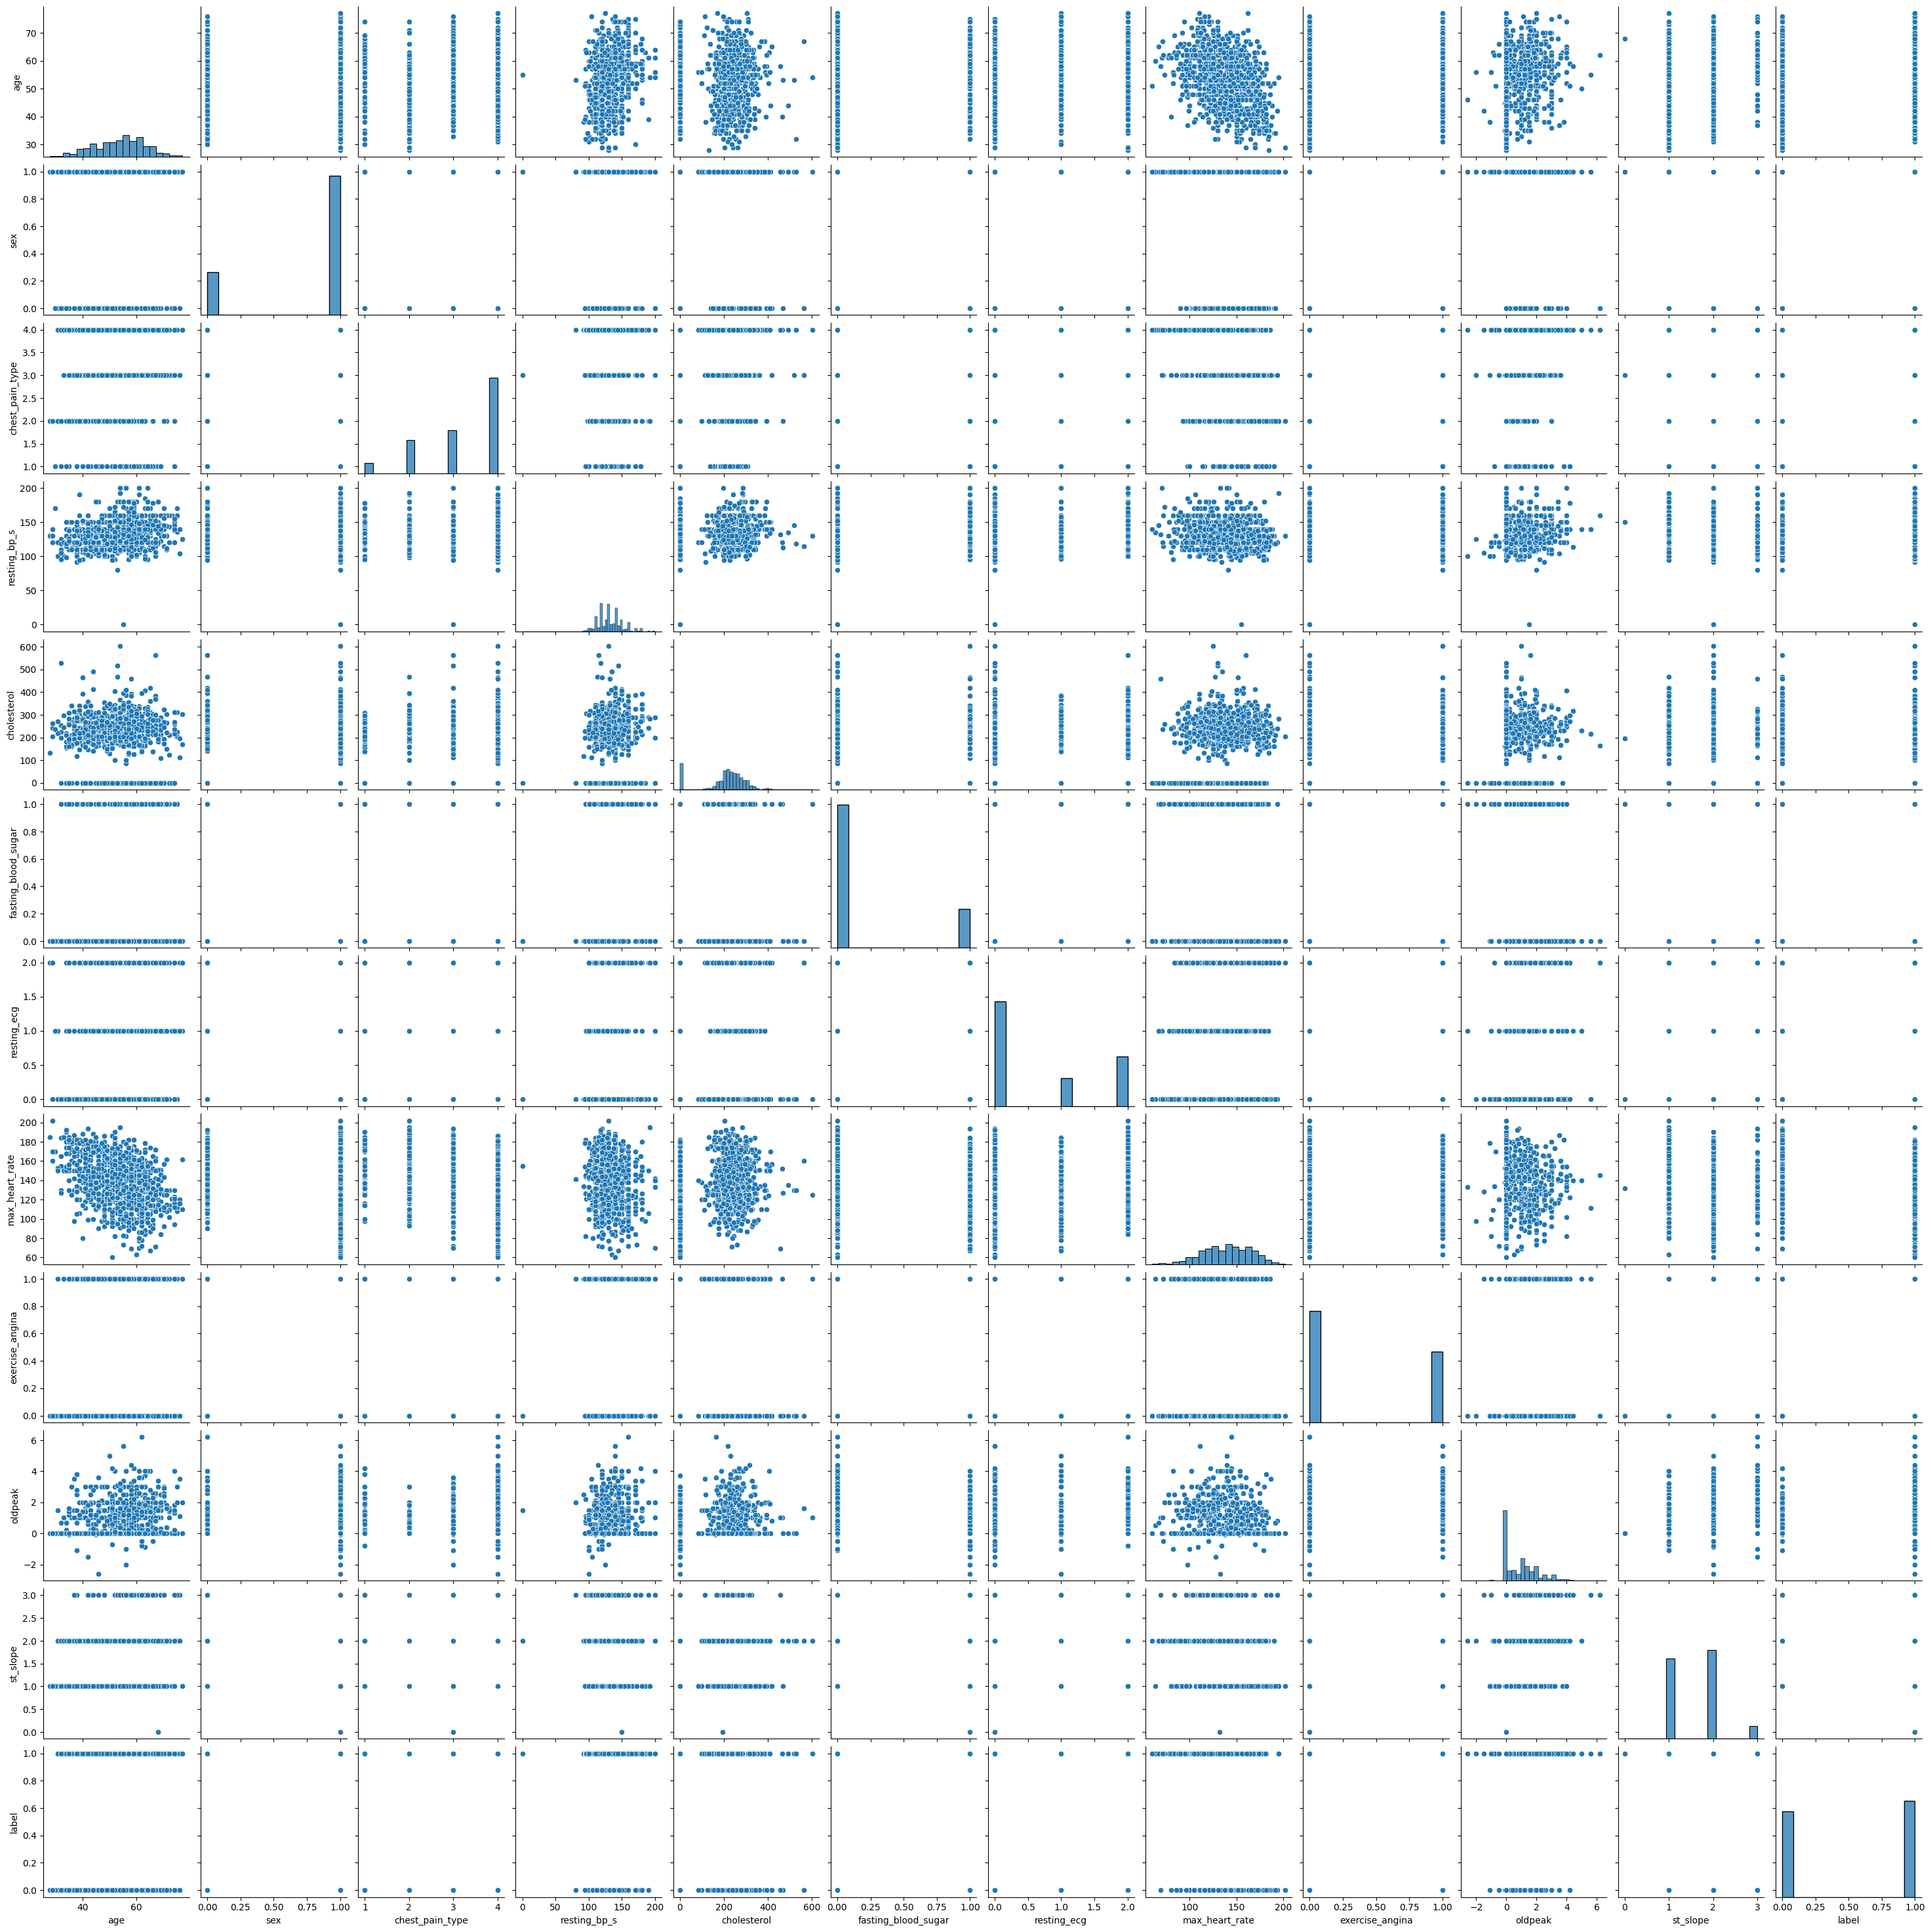

In [15]:
# Set style
sns.pairplot(df)

# Target Distribution

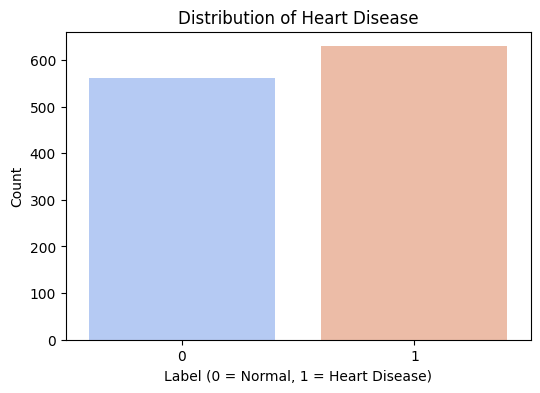

In [17]:
plt.figure(figsize=(6, 4))
sns.countplot(x='label', data=df, palette='coolwarm')
plt.title("Distribution of Heart Disease")
plt.xlabel("Label (0 = Normal, 1 = Heart Disease)")
plt.ylabel("Count")
plt.show()

# Histograms for all numeric features

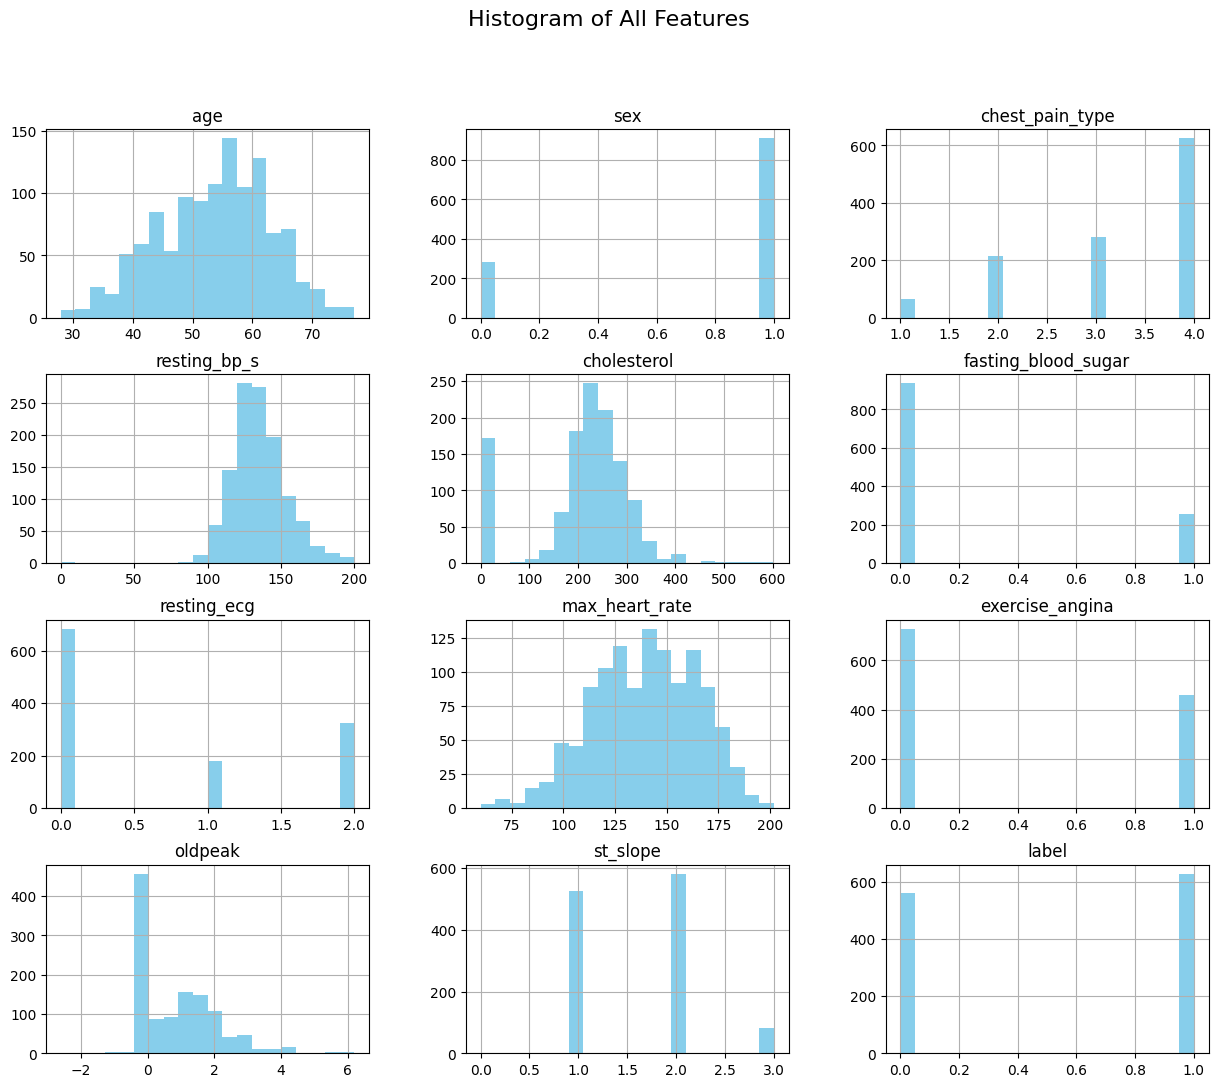

In [19]:
df.hist(bins=20, figsize=(15, 12), color='skyblue')
plt.suptitle("Histogram of All Features", fontsize=16)
plt.show()

# Boxplots for key numeric features vs Target

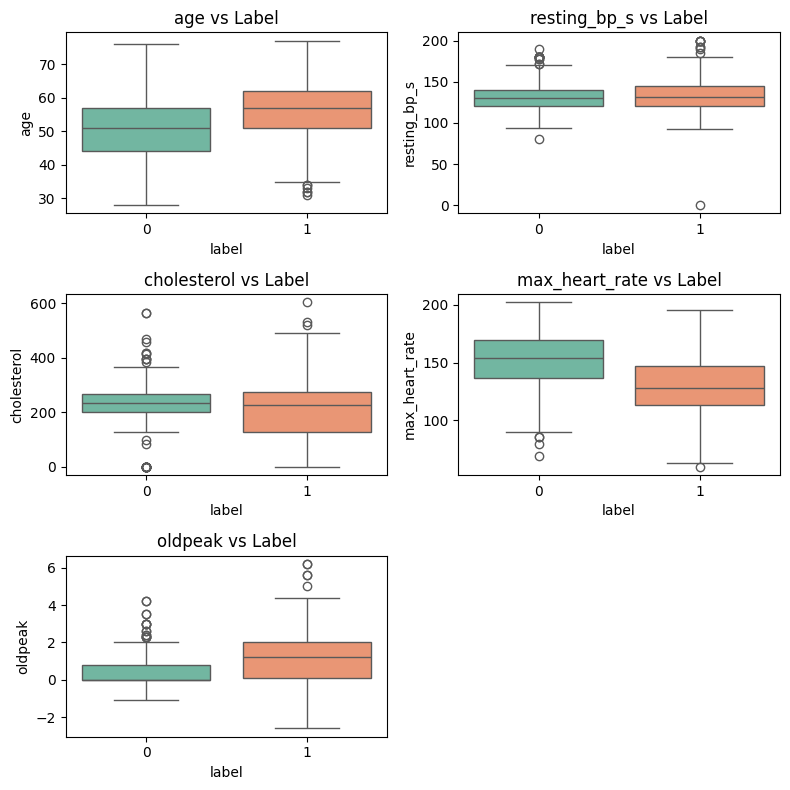

In [21]:
# Boxplots for key numeric features vs Target
numerical_features = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

plt.figure(figsize=(8, 8))
for i, col in enumerate(numerical_features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x='label', y=col, data=df, palette='Set2')
    plt.title(f"{col} vs Label")
plt.tight_layout()
plt.show()

# Correlation Heatmap

<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

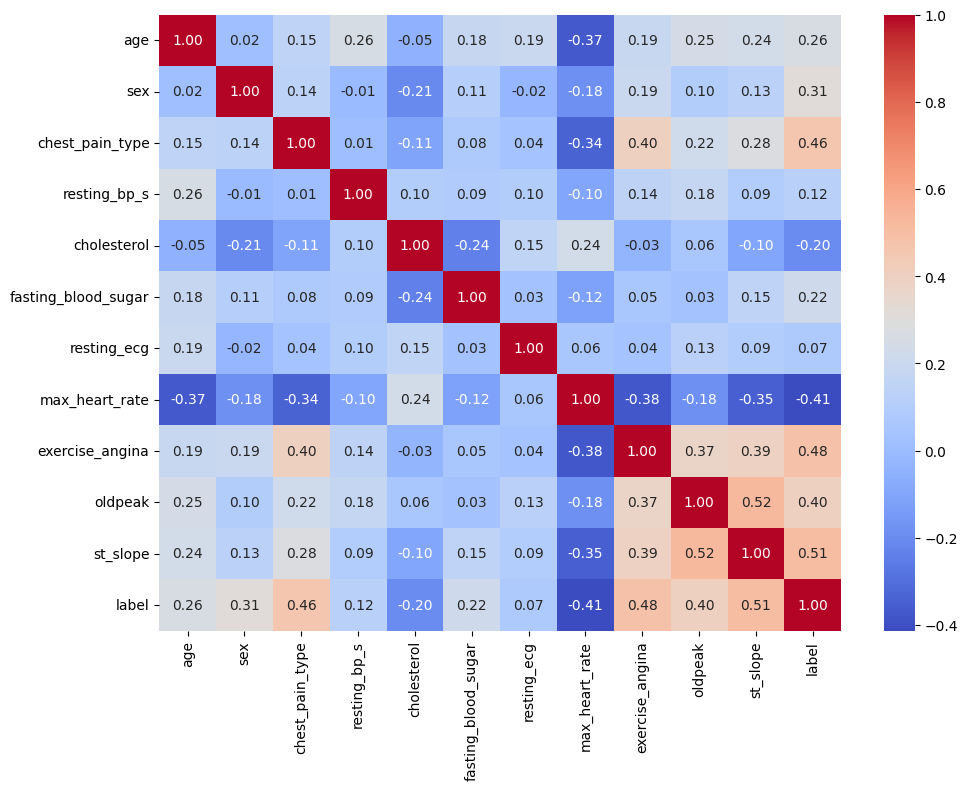

In [23]:
# Correlation Heatmap
plt.figure(figsize=(11, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title

# label encoder

In [25]:
# Initialize label encoder
le = LabelEncoder()

# Apply to 'st_slope' only
df['st_slope'] = le.fit_transform(df['st_slope'])

# Data Cleaning

In [27]:
# Remove rows with invalid cholesterol, bp, or negative oldpeak
df = df[(df['cholesterol'] > 0) & (df['resting_bp_s'] > 0) & (df['oldpeak'] >= 0)]

In [28]:
# Encode categorical features using one-hot encoding
df_encoded = pd.get_dummies(df, columns=['chest_pain_type', 'resting_ecg', 'st_slope'], drop_first=True)


# Feature Scaling

In [30]:
X = df_encoded.drop('label', axis=1)
y = df_encoded['label']


In [31]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# Train-Test Split

In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


# Ml MOdel implementation

# Logistic Regression

In [36]:
# Initialize and train Logistic Regression model
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)


LogisticRegression()

In [37]:
# Predict and evaluate
y_pred_log_reg = log_reg.predict(X_test)
acc_log_reg = accuracy_score(y_test, y_pred_log_reg)



 Logistic Regression Accuracy: 0.8431
Confusion Matrix:
 [[84 17]
 [15 88]]
Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       101
           1       0.84      0.85      0.85       103

    accuracy                           0.84       204
   macro avg       0.84      0.84      0.84       204
weighted avg       0.84      0.84      0.84       204



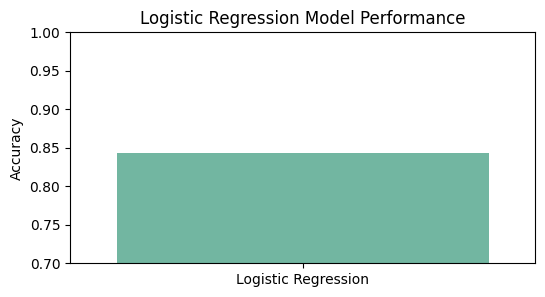

In [38]:
# Display results
print("\n Logistic Regression Accuracy: {:.4f}".format(acc_log_reg))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log_reg))
print("Classification Report:\n", classification_report(y_test, y_pred_log_reg))

# Plot results
plt.figure(figsize=(6, 3))
sns.barplot(x=['Logistic Regression'], y=[acc_log_reg], palette='Set2')
plt.ylabel('Accuracy')
plt.title('Logistic Regression Model Performance')
plt.ylim(0.7, 1.0)
plt.show()

# K-Nearest Neighbors (KNN)

In [40]:
# Initialize and train K-Nearest Neighbors model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [41]:
# Predict and evaluate
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)



 K-Nearest Neighbors Accuracy: 0.8529
Confusion Matrix:
 [[84 17]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.83      0.85       101
           1       0.84      0.87      0.86       103

    accuracy                           0.85       204
   macro avg       0.85      0.85      0.85       204
weighted avg       0.85      0.85      0.85       204



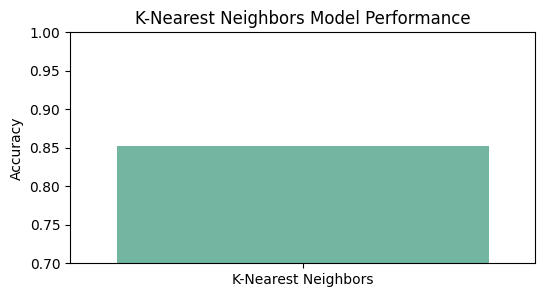

In [42]:
# Display results
print("\n K-Nearest Neighbors Accuracy: {:.4f}".format(acc_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# Plot results
plt.figure(figsize=(6, 3))
sns.barplot(x=['K-Nearest Neighbors'], y=[acc_knn], palette='Set2')
plt.ylabel('Accuracy')
plt.title('K-Nearest Neighbors Model Performance')
plt.ylim(0.7, 1.0)
plt.show()

# Decision Tree

In [44]:
# Initialize and train Decision Tree model
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)


DecisionTreeClassifier()

In [45]:
# Predict and evaluate
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)



 Decision Tree Accuracy: 0.8824
Confusion Matrix:
 [[90 11]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.89      0.88       101
           1       0.89      0.87      0.88       103

    accuracy                           0.88       204
   macro avg       0.88      0.88      0.88       204
weighted avg       0.88      0.88      0.88       204



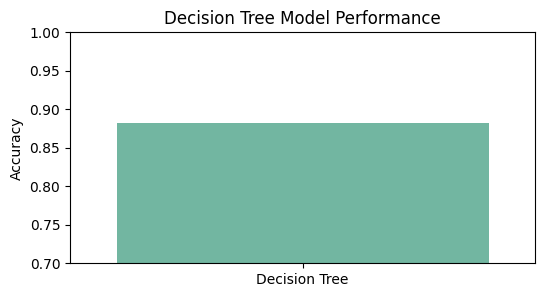

In [46]:
# Display results
print("\n Decision Tree Accuracy: {:.4f}".format(acc_dt))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))
print("Classification Report:\n", classification_report(y_test, y_pred_dt))

# Plot results
plt.figure(figsize=(6,3))
sns.barplot(x=['Decision Tree'], y=[acc_dt], palette='Set2')
plt.ylabel('Accuracy')
plt.title('Decision Tree Model Performance')
plt.ylim(0.7, 1.0)
plt.show()

# Random Forest

In [48]:
# Initialize and train Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)


RandomForestClassifier()

In [49]:
# Predict and evaluate
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)



 Random Forest Accuracy: 0.9363
Confusion Matrix:
 [[95  6]
 [ 7 96]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.94       101
           1       0.94      0.93      0.94       103

    accuracy                           0.94       204
   macro avg       0.94      0.94      0.94       204
weighted avg       0.94      0.94      0.94       204



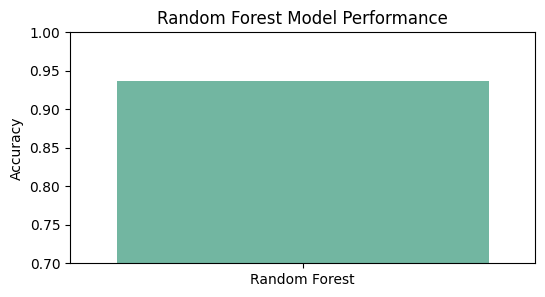

In [50]:
# Display results
print("\n Random Forest Accuracy: {:.4f}".format(acc_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# Plot results
plt.figure(figsize=(6,3))
sns.barplot(x=['Random Forest'], y=[acc_rf], palette='Set2')
plt.ylabel('Accuracy')
plt.title('Random Forest Model Performance')
plt.ylim(0.7, 1.0)
plt.show()

# Support Vector Machine (SVM)

In [52]:
# Initialize and train Support Vector Machine model
svm = SVC()
svm.fit(X_train, y_train)


SVC()

In [53]:
# Predict and evaluate
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)



 Support Vector Machine Accuracy: 0.8725
Confusion Matrix:
 [[88 13]
 [13 90]]
Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.87      0.87       101
           1       0.87      0.87      0.87       103

    accuracy                           0.87       204
   macro avg       0.87      0.87      0.87       204
weighted avg       0.87      0.87      0.87       204



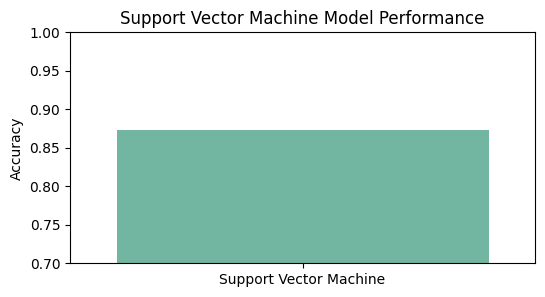

In [54]:
# Display results
print("\n Support Vector Machine Accuracy: {:.4f}".format(acc_svm))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))
print("Classification Report:\n", classification_report(y_test, y_pred_svm))

# Plot results
plt.figure(figsize=(6, 3))
sns.barplot(x=['Support Vector Machine'], y=[acc_svm], palette='Set2')
plt.ylabel('Accuracy')
plt.title('Support Vector Machine Model Performance')
plt.ylim(0.7, 1.0)
plt.show()

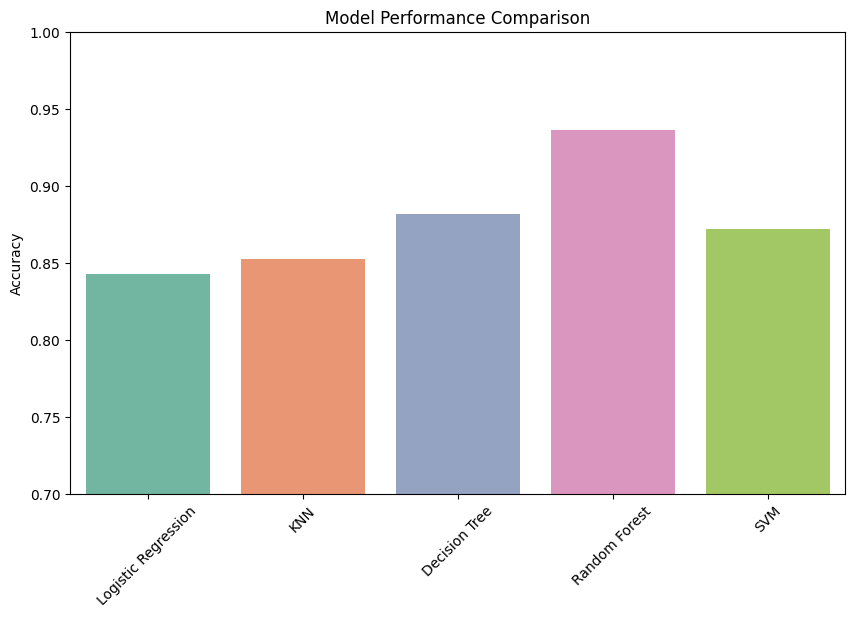

In [55]:
# Accuracy values
model_names = ['Logistic Regression', 'KNN', 'Decision Tree', 'Random Forest', 'SVM']
accuracy_scores = [acc_log_reg, acc_knn, acc_dt,acc_rf,acc_svm  ]

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(x=model_names, y=accuracy_scores, palette='Set2')
plt.ylabel('Accuracy')
plt.title('Model Performance Comparison')
plt.xticks(rotation=45)
plt.ylim(0.7, 1.0)
plt.show()
